In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80
plt.rcParams['figure.figsize'] = (20, 8)
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math
import warnings
import itertools
from statsmodels.tsa.api import Holt
from scipy.optimize import curve_fit
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
def Normality(SD):
    print('Normality test for errors using Shapiro Test')
    print(' - H0: Errors are normally distributed.')
    print(' - H1: Errors are not normally distributed.\n')
    stat, p = stats.shapiro(SD)
    print('pvalue of Shapiro Test =', p)
    if p < 0.05:
        print('\nSince p-value < 0.05, we reject H0 and conclude errors are not normally distributed.')
    else:
        print('\nSince p-value > 0.05, we do not reject H0 and we may conclude errors are normally distributed.')

In [3]:
def Homoscedasticity(data, xlabel):
    print('Homoscedasticity Test')
    print(' - H0: Homoscedasticity')
    print(' - H1: Heteroscedasticity\n')
    y_pre = data[:, 2]
    SD = data[:, 10]
    plt.plot(y_pre, SD, 'o', color = 'gray')
    plt.axhline(y=0, color = 'blue')
    plt.axhline(y=2, color = 'red')
    plt.axhline(y=-2, color = 'red')
    plt.title('Standardized Residual Plot')
    plt.xlabel(xlabel)
    plt.ylabel('Standardized Residual')
    plt.show()
def Randomness(SD):
    print('Randomness Test using Runs Test')
    print(' - H0: Randomness exists.')
    print(' - H1: Randomness does not exist\n')    
    SD_median = statistics.median(SD)    
    runs, n1, n2 = 1, 0, 0
    if(SD[0]) >= SD_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(SD)): 
        # no. of runs 
        if (SD[i] >= SD_median and SD[i-1] < SD_median) or (SD[i] < SD_median and SD[i-1] >= SD_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(SD[i]) >= SD_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    if n1>20 or n2>20:
        print('\nruns_exp = ', runs_exp)
        print('stan_dev = ', stan_dev)
        print('z = ', z)
        print('pval_z = ', pval_z)
        
        if pval_z < 0.05:
            print('\nSince p-value < 0.05, we reject H0 and conclude randomness does not exist.')
        else:
            print('\nSince p-value > 0.0, we do not reject H0 and we may conclude randomness exists.')
    else:
        print('Since both n1 and n2 < 20, we check the Run Test table.')

<div style="background-color:#D9D9D9;"><font size="5"> Q1</font></div>

In [4]:
df1 = pd.read_csv('./Assignment1_Data/MDS_Assignment1_furnace.csv').dropna().astype(float)
df1

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2.0
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4.0
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2.0
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2.0
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.684962,-0.406121,-0.687687,0.271886,-0.232472,0.102129,2.0
616,-0.379487,3.809407,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,2.248407,-0.332678,-0.687687,0.271886,4.519156,0.102129,2.0
617,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-1.023427,1.332042,-0.687687,0.271886,-0.232472,0.102129,2.0
618,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,3.150982,-1.777067,-0.687687,0.271886,-0.232472,0.102129,2.0


In [5]:
y_var = df1['grade'].values
xnames = df1.columns[:-1]
xnames

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

<AxesSubplot:>

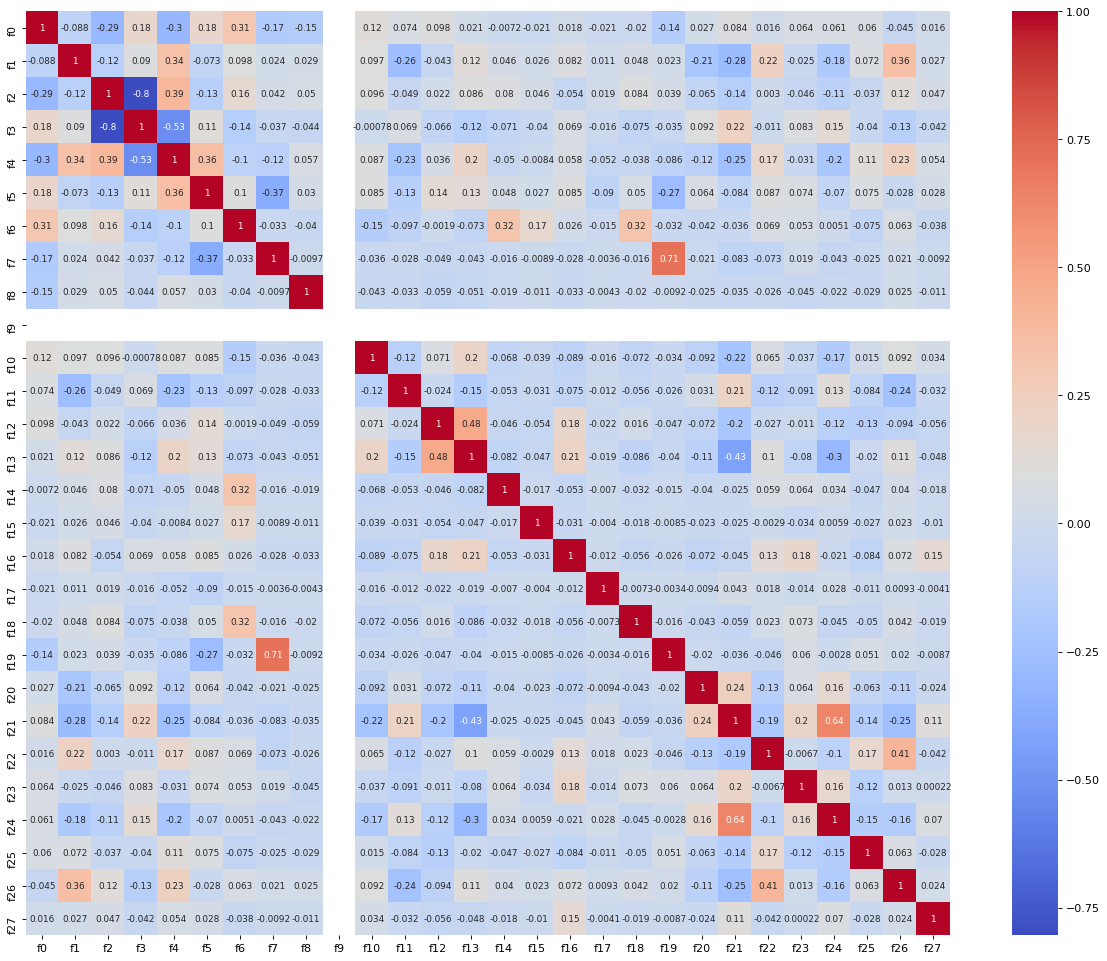

In [6]:
df1a = df1[xnames]
corr1 = df1a.corr()

plt.figure(figsize=(20, 15)) # width and height in inches
sns.heatmap(corr1, cbar=1, square=1, annot=True, annot_kws={'size': 8}, cmap= 'coolwarm')
#(f19, f7), (f2, f3)之間可能有共線性

In [7]:
y_data = df1['grade']

x_data = df1.drop('grade', axis=1)
x_data = sm.add_constant(x_data)   #增加模型的常數，使更為符合回歸模型

model = sm.OLS(y_data, x_data)    #OLS回歸
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        01:42:15   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.0

In [8]:
#在做多變量分析時，雖然上表顯示許多p-value有顯著水準（代表該變量x確實與y有線性關係)
#但會忽略掉考慮多元共線性multicollinearity的部分。因此還需要看整體性F-test來看此model是否valid
#若是單變量分析，F-test的p-value會和t-test的p-value相同

In [9]:
df_1 = pd.read_html(results.summary().tables[0].as_html(),header=0,index_col=0)[0]
df_2 = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
display(df_1)

,grade,R-squared:,0.495
Dep. Variable:,,,
Model:,OLS,Adj. R-squared:,4.720000e-01
Method:,Least Squares,F-statistic:,2.152000e+01
Date:,"Fri, 07 Oct 2022",Prob (F-statistic):,1.160000e-70
Time:,01:42:15,Log-Likelihood:,-3.815200e+02
No. Observations:,620,AIC:,8.190000e+02
Df Residuals:,592,BIC:,9.431000e+02
Df Model:,27,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


In [10]:
#(a.)
df_2.rename_axis('var', inplace=True)
display(df_2[1:])

,coef,std err,t,P>|t|,[0.025,0.975]
var,,,,,,
f0,-5.500000e-03,2.500000e-02,-0.224,0.823,-5.400000e-02,4.300000e-02
f1,4.400000e-02,2.800000e-02,1.571,0.117,-1.100000e-02,9.900000e-02
f2,3.140000e-01,3.500000e-02,9.028,0.000,2.460000e-01,3.820000e-01
f3,1.860000e-02,4.200000e-02,0.447,0.655,-6.300000e-02,1.000000e-01
f4,-3.500000e-03,3.800000e-02,-0.091,0.928,-7.800000e-02,7.200000e-02
f5,-7.400000e-02,3.000000e-02,-2.483,0.013,-1.330000e-01,-1.500000e-02
f6,-7.100000e-02,2.600000e-02,-2.742,0.006,-1.220000e-01,-2.000000e-02
f7,2.350000e-02,2.800000e-02,0.853,0.394,-3.100000e-02,7.800000e-02
f8,4.100000e-02,1.900000e-02,2.170,0.030,4.000000e-03,7.800000e-02


In [11]:
coef = df_2.coef
var_id = df_2.index
print(f'The regression line fit is: {coef[28]}')
for i in range(1,28,4):
    print(f"  +f{i-1} *{coef[i]}  +f{i} *{coef[i+1]}  +f{i+1} *{coef[i+2]}  +f{i+2} *{coef[i+3]}")

The regression line fit is: -0.0062
  +f0 *-0.0055  +f1 *0.044  +f2 *0.314  +f3 *0.0186
  +f4 *-0.0035  +f5 *-0.074  +f6 *-0.071  +f7 *0.0235
  +f8 *0.041  +f9 *-1.129e-16  +f10 *-0.0446  +f11 *-0.0292
  +f12 *-0.0006  +f13 *0.0336  +f14 *-0.1832  +f15 *-0.1061
  +f16 *-0.0358  +f17 *0.0633  +f18 *-0.1904  +f19 *0.0278
  +f20 *0.0126  +f21 *-0.0357  +f22 *0.0747  +f23 *-0.0088
  +f24 *0.0193  +f25 *-0.0679  +f26 *-0.036  +f27 *-0.0062


### (b.)
I think it's <b>not</b> appropriate to adopt the analysis above, since there are too many redundent variables being use to fit the multiple regression. <br>Simply put, those variables with large p-value should be exclude from the regression analysis, to enhance the performance of the regression line& adjusted r-square. Because the relevance between those variables and our target- `grade` aren't significant.

In [12]:
#(c.)
imp_var = df_2[1:].query("`P>|t|` <=0.01")
#display(imp_var.index)
imp_var.sort_values(by=['P>|t|'], inplace=True)
display(imp_var)

print("The important variable rank: ",end = " ")
for idx in imp_var.index:
    print(idx, end = " ")

,coef,std err,t,P>|t|,[0.025,0.975]
var,,,,,,
f2,3.140000e-01,3.500000e-02,9.028,0.000,2.460000e-01,3.820000e-01
f9,-1.129000e-16,2.710000e-17,-4.171,0.000,-1.660000e-16,-5.970000e-17
f14,-1.832000e-01,2.100000e-02,-8.898,0.000,-2.240000e-01,-1.430000e-01
f15,-1.061000e-01,1.900000e-02,-5.565,0.000,-1.440000e-01,-6.900000e-02
f18,-1.904000e-01,2.100000e-02,-9.194,0.000,-2.310000e-01,-1.500000e-01
f22,7.470000e-02,2.100000e-02,3.533,0.000,3.300000e-02,1.160000e-01
f17,6.330000e-02,1.900000e-02,3.409,0.001,2.700000e-02,1.000000e-01
f25,-6.790000e-02,2.000000e-02,-3.406,0.001,-1.070000e-01,-2.900000e-02
f6,-7.100000e-02,2.600000e-02,-2.742,0.006,-1.220000e-01,-2.000000e-02


The important variable rank:  f2 f9 f14 f15 f18 f22 f17 f25 f6 

Test the required condition under 0.05 significance level:




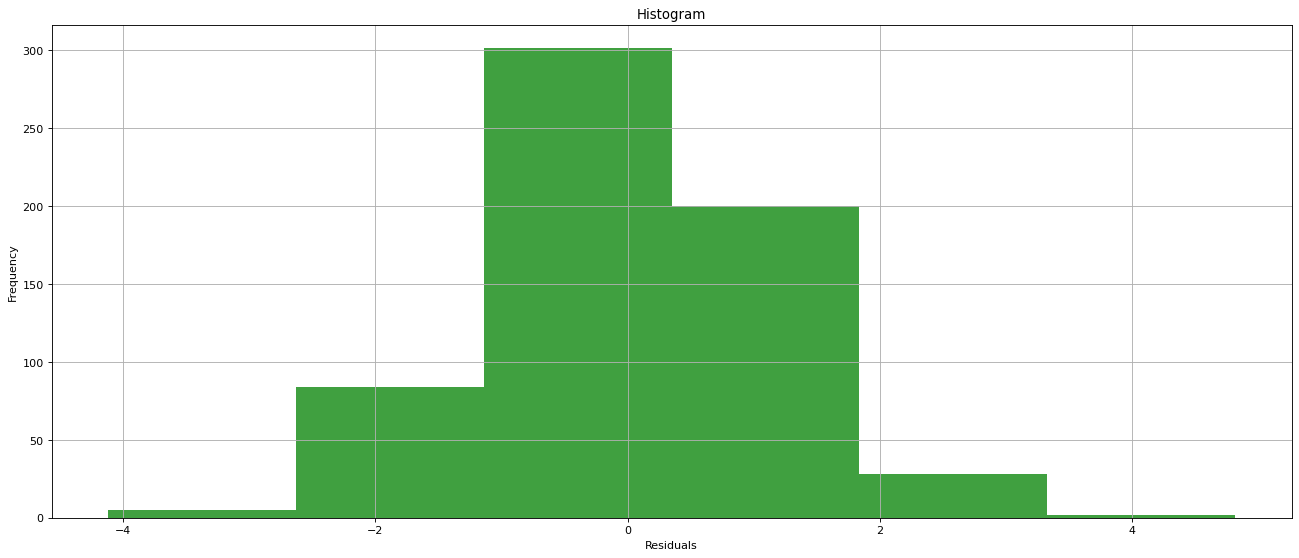

Normality test for errors using Shapiro Test
 - H0: Errors are normally distributed.
 - H1: Errors are not normally distributed.

pvalue of Shapiro Test = 6.288533536675904e-16

Since p-value < 0.05, we reject H0 and conclude errors are not normally distributed.


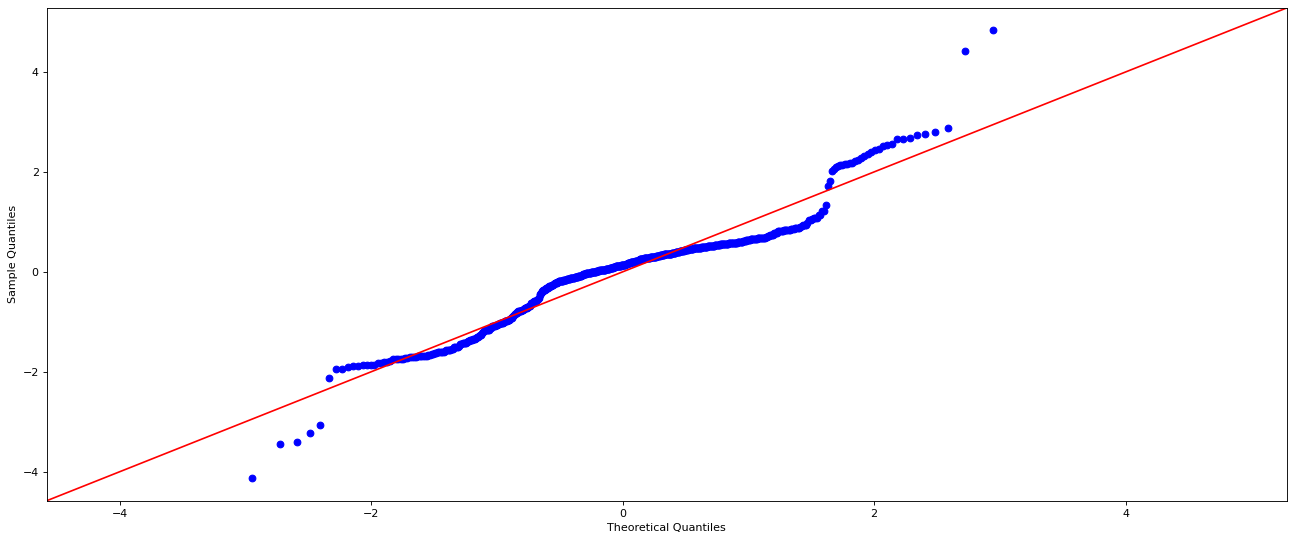

In [13]:
#(d.)
print("Test the required condition under 0.05 significance level:\n\n")
st, data, ss2 = sso.summary_table(results, alpha=0.05)
y_pre = data[:, 2]
SD = data[:, 10]
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()
fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
Normality(SD)

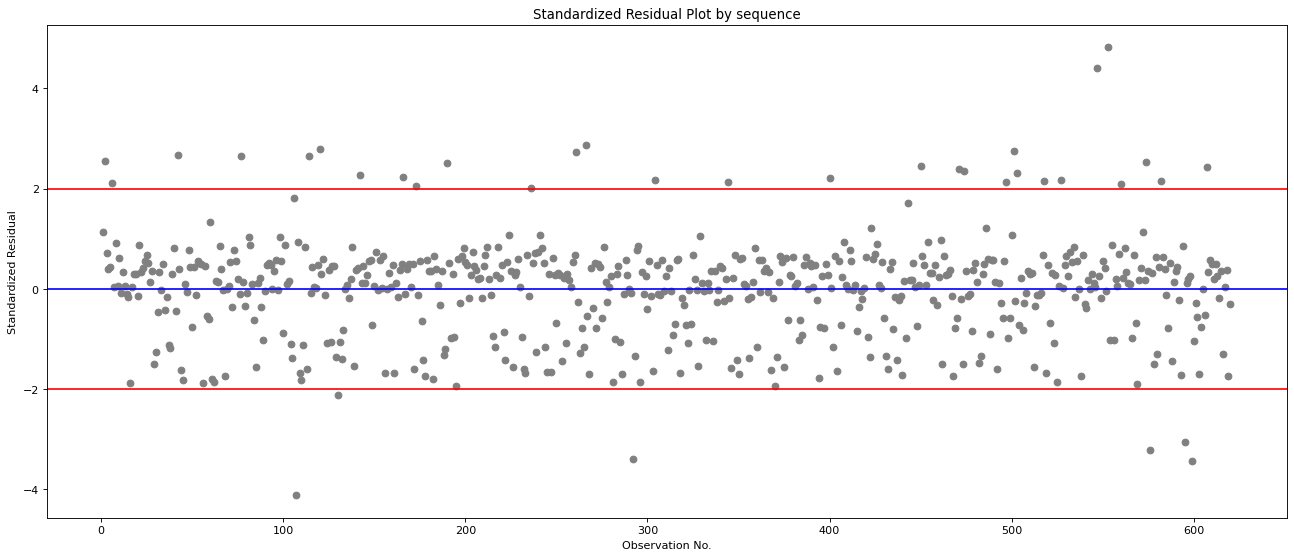

No obvious correlation between sampling sequence and value
Randomness Test using Runs Test
 - H0: Randomness exists.
 - H1: Randomness does not exist

runs =  321
n1 =  311
n2 =  310

runs_exp =  311.49919484702093
stan_dev =  12.449851068276283
z =  0.7631260085663404
pval_z =  0.44538825038055774

Since p-value > 0.0, we do not reject H0 and we may conclude randomness exists.


In [14]:
print("{:=^100s}".format(""))
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot by sequence')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()
print("No obvious correlation between sampling sequence and value") #時間序列正常
Randomness(SD)

Homoscedasticity Test
 - H0: Homoscedasticity
 - H1: Heteroscedasticity



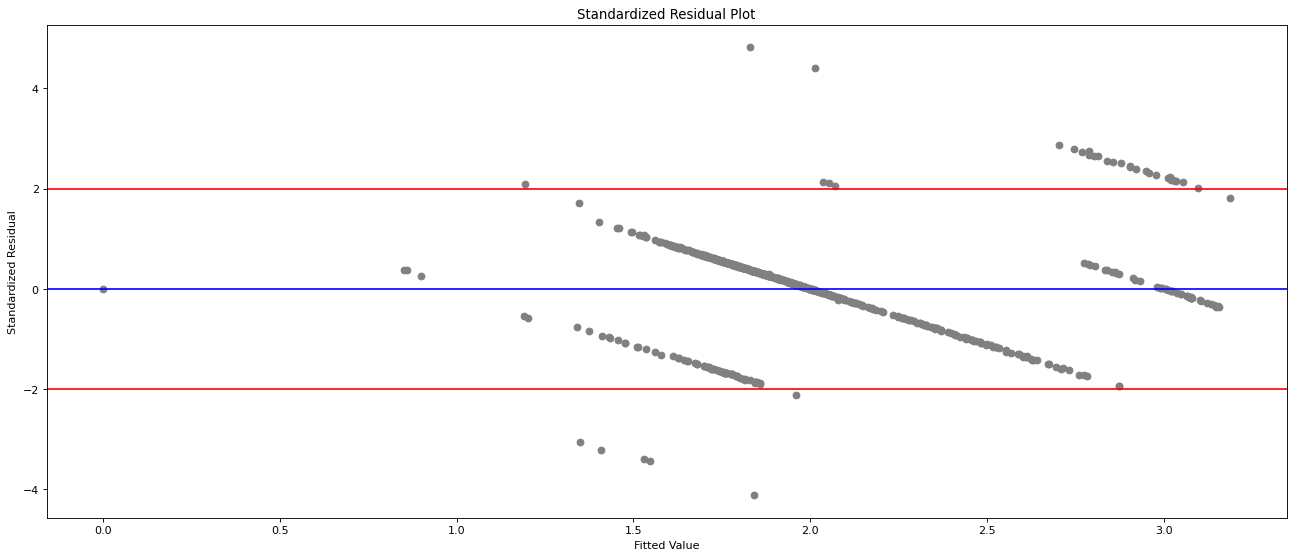

We do not reject H0. We can assume the variation is constant and the mean is around 0.


In [15]:
print("{:=^100s}".format(""))
Homoscedasticity(data,"Fitted Value") 

In [16]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
#https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/
# Get the test result
test_result = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(names, test_result)
print("From the plot and the p-value of breusch-pagan-test, \n\twe can reject H0 and conclude that Heteroscedasticity exist.")

From the plot and the p-value of breusch-pagan-test, 
	we can reject H0 and conclude that Heteroscedasticity exist.


<div style="background-color:#D9D9D9;"><font size="5"> Q2</font></div><br>
Use “association rule” to find the potential patterns which satisfy the following criterion:<br>

+ Set the minimum support to 0.001
+ Set the minimum confidence of 0.15

In [17]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [18]:
df2 = pd.read_csv('./Assignment1_Data/MDS_Assignment1_groceries.csv', header=None, sep='\n').astype('str')#error_bad_lines=False 
bags = df2[0].str.split(',').dropna()#, expand=True #unstack可以搭配groupby用
bags

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9830    [sausage, chicken, beef, hamburger meat, citru...
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
Name: 0, Length: 9835, dtype: object

In [19]:
te = TransactionEncoder()
te_ary = te.fit(bags).transform(bags)
basket_sets = pd.DataFrame(te_ary, columns=te.columns_)
basket_sets

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)
...,...,...
13487,0.001017,"(whipped/sour cream, yogurt, whole milk, root ..."
13488,0.001017,"(yogurt, whole milk, root vegetables, other ve..."
13489,0.001322,"(pip fruit, yogurt, whole milk, root vegetable..."
13490,0.001322,"(yogurt, whole milk, root vegetables, other ve..."


In [21]:
#rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=4) 不同判斷標準
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.15)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(butter),0.008033,0.055414,0.001220,0.151899,2.741145,0.000775,1.113765
1,(Instant food products),(curd),0.008033,0.053279,0.001322,0.164557,3.088583,0.000894,1.133196
2,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640
3,(Instant food products),(other vegetables),0.008033,0.193493,0.002745,0.341772,1.766332,0.001191,1.225271
4,(Instant food products),(pastry),0.008033,0.088968,0.001423,0.177215,1.991899,0.000709,1.107254
...,...,...,...,...,...,...,...,...,...
32738,"(other vegetables, root vegetables, yogurt, tr...","(whole milk, whipped/sour cream)",0.004982,0.032232,0.001118,0.224490,6.964849,0.000958,1.247912
32739,"(whole milk, root vegetables, other vegetables...","(whipped/sour cream, yogurt)",0.007016,0.020742,0.001118,0.159420,7.685777,0.000973,1.164979
32740,"(root vegetables, whipped/sour cream, yogurt)","(whole milk, other vegetables, tropical fruit)",0.006406,0.017082,0.001118,0.174603,10.221561,0.001009,1.190843
32741,"(whipped/sour cream, tropical fruit, yogurt)","(whole milk, root vegetables, other vegetables)",0.006202,0.023183,0.001118,0.180328,7.778617,0.000975,1.191717


In [22]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules =rules[ (rules['antecedent_len'] >= 2) &
       (rules['consequents_len'] >= 2) &
       (rules['confidence'] > 0.3) &
       (rules['lift'] > 5) ]
show_rules = rules.sort_values(by='confidence', ascending=False)
show_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
32649,"(root vegetables, yogurt, oil, tropical fruit)","(whole milk, other vegetables)",0.001118,0.074835,0.001017,0.909091,12.147974,0.000933,10.176817,4,2
29287,"(white bread, root vegetables, butter)","(whole milk, other vegetables)",0.001220,0.074835,0.001017,0.833333,11.135643,0.000925,5.550991,3,2
31746,"(root vegetables, yogurt, rice)","(whole milk, other vegetables)",0.001627,0.074835,0.001322,0.812500,10.857252,0.001200,4.934215,3,2
32536,"(domestic eggs, yogurt, butter, tropical fruit)","(whole milk, other vegetables)",0.001322,0.074835,0.001017,0.769231,10.279055,0.000918,4.009049,4,2
29365,"(white bread, butter, tropical fruit)","(other vegetables, yogurt)",0.001322,0.043416,0.001017,0.769231,17.717528,0.000959,4.145196,3,2
...,...,...,...,...,...,...,...,...,...,...,...
30870,"(pip fruit, fruit/vegetable juice, other veget...","(whole milk, root vegetables)",0.004372,0.048907,0.001322,0.302326,6.181647,0.001108,1.363233,3,2
24178,"(ham, tropical fruit)","(pip fruit, other vegetables)",0.005389,0.026131,0.001627,0.301887,11.552749,0.001486,1.395001,2,2
24262,"(ham, tropical fruit)","(whole milk, yogurt)",0.005389,0.056024,0.001627,0.301887,5.388487,0.001325,1.352181,2,2
19329,"(curd, citrus fruit)","(whole milk, yogurt)",0.007117,0.056024,0.002135,0.300000,5.354809,0.001736,1.348537,2,2


(1.) How to handle the raw dataset via data preprocessing?<br>
We can merge every transaction and transfer them into a `sparse matrix` containing only 0s and 1s,<br> 
with column named by each product name. After that, we can implement the association rule.

In [23]:
#(2.)
print("Listed below are the top 5 association rule ranked by confidence: ")
result = pd.concat([show_rules.iloc[:5, 0:2], show_rules.iloc[:5, 4:7]], axis=1, join="outer")
result

Listed below are the top 5 association rule ranked by confidence: 


,antecedents,consequents,support,confidence,lift
32649,"(root vegetables, yogurt, oil, tropical fruit)","(whole milk, other vegetables)",0.001017,0.909091,12.147974
29287,"(white bread, root vegetables, butter)","(whole milk, other vegetables)",0.001017,0.833333,11.135643
31746,"(root vegetables, yogurt, rice)","(whole milk, other vegetables)",0.001322,0.812500,10.857252
32536,"(domestic eggs, yogurt, butter, tropical fruit)","(whole milk, other vegetables)",0.001017,0.769231,10.279055
29365,"(white bread, butter, tropical fruit)","(other vegetables, yogurt)",0.001017,0.769231,17.717528


(3.) Please provide/guess the “story” to interpret one of top-5 rules you are interested in.<br>
Take association rule No.32651 as example, maybe he/she is vegetarian or someone willing to get a balanced diet.<br> When preparing the meal for the next few days, those products(tropical fruit, yogurt, oil, root vegetables, other vegetables, whole milk) <br>are usually the main component of his/her diet.

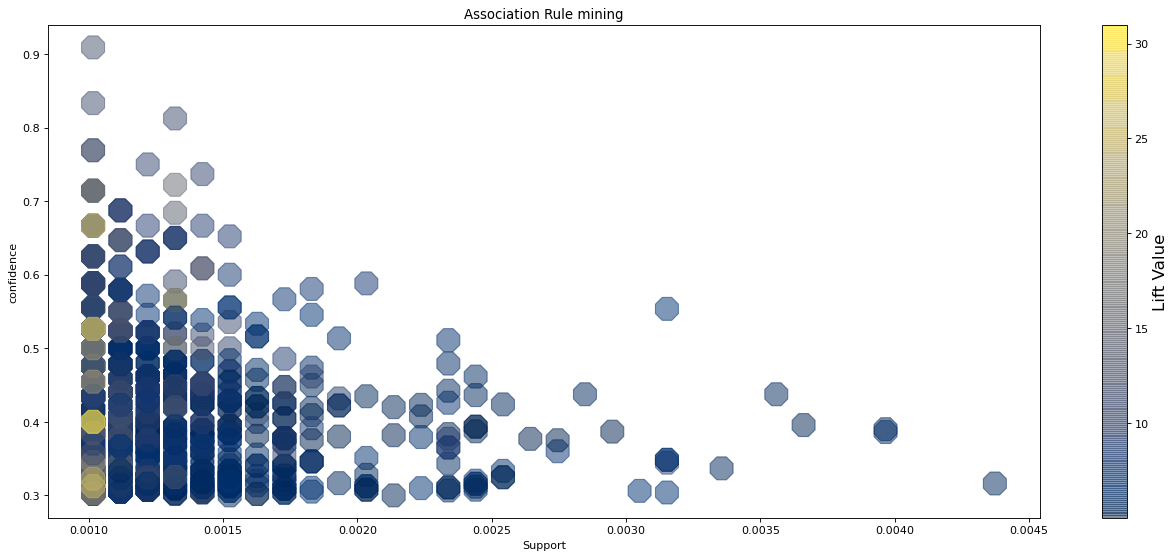

In [24]:
#(4.)
x = rules['support']
y = rules['confidence']
z = rules['lift']
plt.title('Association Rule mining')
plt.xlabel('Support')
plt.ylabel('confidence')
plt.scatter(x, y, s=500, c=z, marker="8",cmap="cividis", alpha=0.5)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label(label="Lift Value", size = 15)

Take the Top 40 rules (by confidence)


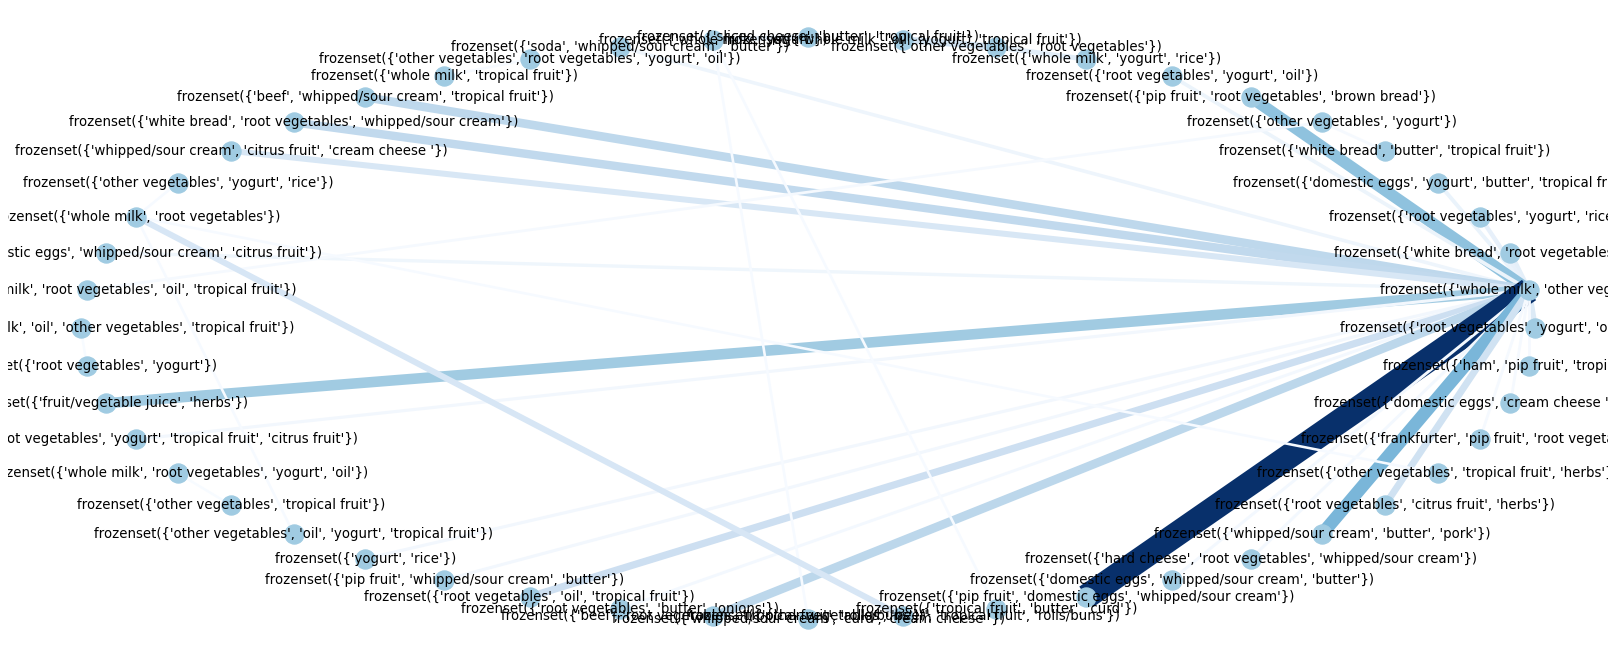

In [25]:
import networkx as nx
import re
plot_size = 40

G_rules = nx.from_pandas_edgelist(show_rules[:plot_size],source='antecedents', target='consequents', edge_attr="support")
width = np.square(show_rules['lift'][:plot_size].values)/30
#nx.draw_networkx(G_rules, arrows = True, node_color = 'red', edge_color = 'black' ,with_labels = True, node_size = 100)
options = {
    "node_color": "#A0CBE2",
    "edge_color": width,
    "width": width,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    "node_size" : 300,
    "arrows": True,
}

print('Take the Top 40 rules (by confidence)')
nx.draw_circular(G_rules, **options )
plt.show()

<div style="background-color:#D9D9D9;"><font size="5"> Q3</font></div>
<h3>Manufacturing System Analysis<h3>
    <s>假設產品在加工時，經過一種工作站，只需經過此種工作站之一台機台( 一種工作站的所有機台都為平行機台)。</s>

### (a.) 
1~5號工作站的產出率TH分別為：$\frac{3}{5}$, $\frac{3}{8}$, $\frac{1}{2}$, $\frac{1}{2}$, $\frac{5}{12}$ <br>
瓶頸站產出率$r_b$為 $\frac{3}{8}$，最小生產週期時間$T_0$為$\frac{5}{3}+\frac{8}{3}+2+2+\frac{12}{5} = \frac{161}{15}$(hour) <br>
關鍵在製品水準(critical WIP, $W_0$) $= r_b \times T_0 = \frac{161}{40}$

### (b.)
$$ CTbest(w)=\left\{
\begin{array}{rcl}
\frac{161}{15}    &      & ,{w   \leq  \frac{161}{40}     }\\
\frac{8w}{3}      &      & ,otherwise
\end{array} \right. $$
<br>
$$ THbest(w)=\left\{
\begin{array}{rcl}
\frac{15w}{161}   &      & ,{w   \leq  \frac{161}{40}     }\\
\frac{3}{8}       &      & ,otherwise
\end{array} \right. $$

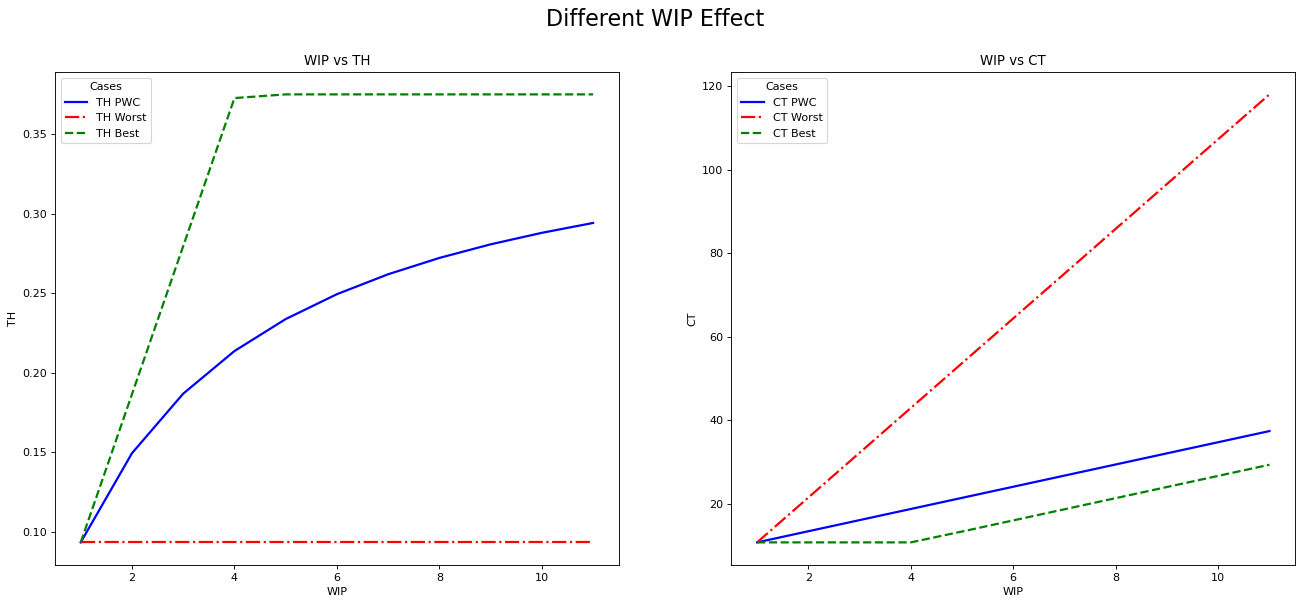

In [26]:
#(c.)
T0 = 161/15
rb = 3/8
w0 = T0*rb
THw = 1/T0
maxw = int(w0*3) #設一個w0的倍數去看

wip =[] # WIP levels

THpwc =[] # practical worst case throughput
THw = [] # worst case throughput
THb = [] # best case throughput

CTpwc =[] # practical worst case CT
CTw = [] # worst case CT
CTb = [] # best case CT

for i in range(1,maxw):
    wip = np.append(wip, [i], axis=0)
    THpwc = np.append(THpwc, [i/(w0+i-1)*rb], axis=0)
    THw = np.append(THw, [1/T0], axis=0)
    THb = np.append(THb, [i/T0 if i<=w0 else rb], axis=0)
    
    CTpwc = np.append(CTpwc, [T0+((i-1)/rb)], axis=0)
    CTw = np.append(CTw, [i*T0], axis=0)
    CTb = np.append(CTb, [T0 if i<=w0 else i/rb], axis=0)
    
# plot our results
figure, ax = plt.subplots(1, 2)
ax[0].plot(wip, THpwc, marker='', color='blue', linewidth=2, label="TH PWC")
ax[0].plot(wip, THw, marker='', color='red', linewidth=2, linestyle='-.', label="TH Worst")
ax[0].plot(wip, THb, marker='', color='green', linewidth=2, linestyle='dashed', label="TH Best")

ax[0].set(xlabel='WIP', ylabel='TH')
ax[0].legend(title='Cases', title_fontsize = 10)
ax[0].set_title("WIP vs TH")

ax[1].plot(wip, CTpwc, marker='', color='blue', linewidth=2, label="CT PWC")
ax[1].plot(wip, CTw, marker='', color='red', linewidth=2, linestyle='-.', label="CT Worst")
ax[1].plot(wip, CTb, marker='', color='green', linewidth=2, linestyle='dashed', label="CT Best")

ax[1].set(xlabel='WIP', ylabel='CT')
ax[1].legend(title='Cases', title_fontsize = 10)
ax[1].set_title("WIP vs CT")

plt.suptitle('Different WIP Effect',fontsize=20)
fig.tight_layout()
plt.show()